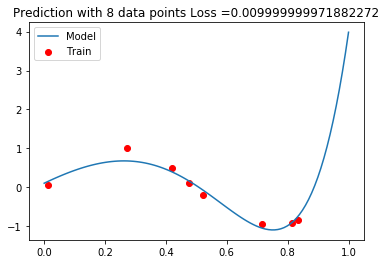

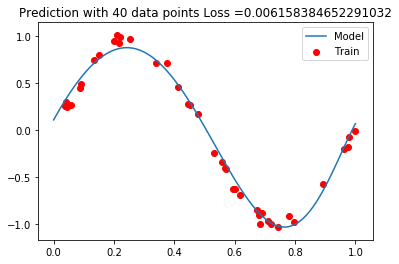

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 22 14:28:30 2021

@author: gsezg
"""
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def g_t(x):
    noise = torch.empty(len(x)).normal_(mean=0,std=0.05)
    y = torch.sin(2*np.pi*x)
    y[:,0] += noise[:]
    
    return y

data_no = [5,10,20,50,100,1000]

numpts = 100
rad = torch.tensor(np.linspace(0,1,numpts))
rad_x = torch.zeros((numpts,1))
rad_x[:,0] = rad[:]
rad_y = g_t(rad_x)

poly = SVR(kernel = 'poly', C=5.0 , gamma='auto' , degree=10 , epsilon=0.1,coef0=1.0)

for i in data_no:
        
    data = i
    
    x_train = torch.tensor(np.random.rand(int(data*0.8),1))
    y_train = g_t(x_train)
   
    x_test = torch.tensor(np.random.rand(int(data*0.2),1))
    y_test = g_t(x_test)
    
    pred_y = poly.fit(x_train,torch.ravel(y_train)).predict(rad_x)
    pred_y_test = poly.fit(x_test,torch.ravel(y_test)).predict(rad_x)
    
    loss = mean_squared_error(y_test, poly.predict(x_test))
    
    plt.plot(rad_x,pred_y, label='Model')
    plt.scatter(x_train,y_train, label='Train', color ='r')
    
    plt.legend()
    plt.title('Prediction with '+str(int(i*0.8))+' data points'+' Loss ='+str(loss) )
    
    plt.savefig(str(i)+"-data-fit.jpg")
    plt.show()